Example Practice as a part of Machine Learning course by Cognitive Class (IBM). 

# Simple Linear Regression:
* To predict relation of one dependent variable (continous) with one independent variable (can be continous or discrete).

*Scikit-learn* library for demonstrating Simple Linear Regression.

Dataset related to Fuel consumption and Carbon dioxide emission of cars.
Split of data into train and test sets, model creation using training set, evaluating using test set, and finally prediction for unknown value.



**Package import**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

**Downloading Data**

!wget is a free network utility tool to download files from WWW using HTTP and FTP

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv

--2021-06-10 05:34:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.003s  

2021-06-10 05:34:57 (24.0 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



**Reading Data**

In [3]:
# Other way to directly read from url
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv")
df.head()
df.to_csv('FuelConsumption.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


**Data Exploration**

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


**take some feature for data exploration

In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


**Data Plot for each features**

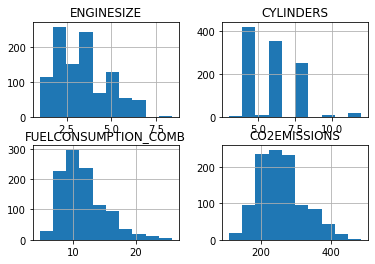

In [10]:
viz = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

**Data Plot for each feature vs Emission to see how linear is their relation**

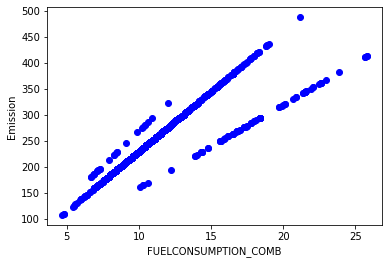

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

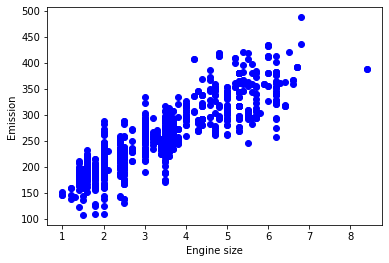

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

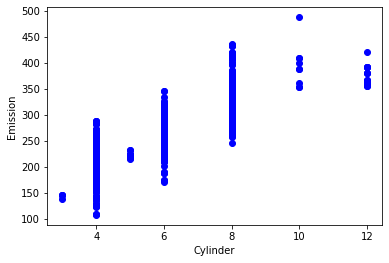

In [14]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

**Creating train and test dataset**
Train/Test split involves spliting the dataset into training and test sets respectively, which are mutually exclusive. Model is train using train data set and test using test data set after which it will provide a more accurate result for out-of-sample.


dataset spilt into 80% train and 20% test data set.

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

**Simple Regression Model**
* Sklern package to model the data

In [24]:
from sklearn import linear_model

In [37]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
#train_x = train[['ENGINESIZE']]
train_y = np.asanyarray(train[['CO2EMISSIONS']])
#train_y = train[['CO2EMISSIONS']]
regr.fit(train_x, train_y)

#The coefficients
print('Coefficients', regr.coef_)
print('Intercept', regr.intercept_)


Coefficients [[38.9740568]]
Intercept [125.3779544]


**Plot outputs**

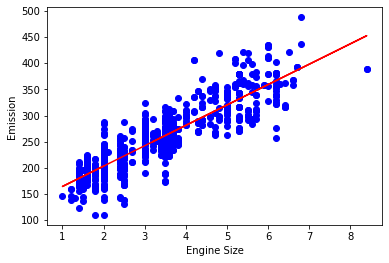

In [38]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_*train_x+regr.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

**Evaluation**

* Compare the actual value with the predicted value to calculate the accuracy of the regression model. Evaluation metrics provide a key role in the development of a model, as it provides insights to areas that require improvement.

There are different evaluation metrices:
1. Mean absolute error : Means of the absolute of the errors. (just average error).
2. Mean Square Error (MSE): Mean of the squared error. More popular because the focus is geared more towards large errors.
3. Root Mean Squared Error (RMSE): Square root of the MSE.
4. R-squared: is not an error. but it is popular metrices for accuracy of the model. It represents how close the data are to the fitted regression line. Best possible square is 1.0 and it can be negative (beacuse the model can be arbitrarily worse).

In [41]:
from sklearn.metrics import r2_score

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]
test_y_hat = regr.predict(test_x)

print('Mean Absoulte Error: %.2f' % np.mean(np.absolute(test_y_hat-test_y)))
print('Residual sum of  squares (MSE): %.2f' % np.mean((test_y_hat-test_y)**2) )
print('R2-score: %.2f' % r2_score(test_y_hat, test_y))


Mean Absoulte Error: 24.98
Residual sum of  squares (MSE): 1089.13
R2-score: 0.64
